#Step 1 Importing Library


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2 Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#beth_df_1 = pd.read_csv("labelled_training_data.csv")
import pandas as pd 
beth_df_1=pd.read_csv('/content/drive/MyDrive/Beth/labelled_testing_data.csv',  encoding='ISO-8859-1')
beth_df_1.head()

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,129.050634,382,382,1,101,4026532232,systemd-resolve,ip-10-100-1-217,41,socket,"[140159195621643, 140159192455417, 94656731598...",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
1,129.051238,379,379,1,100,4026532231,systemd-network,ip-10-100-1-217,41,socket,"[139853228042507, 93935071185801, 93935080775184]",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
2,129.051434,1,1,0,0,4026531840,systemd,ip-10-100-1-217,1005,security_file_open,"[140362867191588, 8103505641674583858]",4,0,"[{'name': 'pathname', 'type': 'const char*', '...",0,0
3,129.051481,1,1,0,0,4026531840,systemd,ip-10-100-1-217,257,openat,[],4,17,"[{'name': 'dirfd', 'type': 'int', 'value': -10...",0,0
4,129.051522,1,1,0,0,4026531840,systemd,ip-10-100-1-217,5,fstat,[140362867189385],2,0,"[{'name': 'fd', 'type': 'int', 'value': 17}, {...",0,0


In [ ]:
#beth_df_2 = pd.read_csv("labelled_testing_data.csv")
#beth_df_3 = pd.read_csv("labelled_validation_data.csv")
import pandas as pd 
beth_df_2=pd.read_csv('/content/drive/MyDrive/Beth/labelled_training_data.csv',  encoding='ISO-8859-1')
beth_df_2.head()
beth_df_3=pd.read_csv('/content/drive/MyDrive/Beth/labelled_validation_data.csv',  encoding='ISO-8859-1')
beth_df_3.head()


,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,124.439221,381,381,1,101,4026532232,systemd-resolve,ip-10-100-1-129,41,socket,"[139913106282763, 139913103116537, 94901962555...",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
1,124.439751,378,378,1,100,4026532231,systemd-network,ip-10-100-1-129,41,socket,"[140343254628619, 93967981149065, 93967990898192]",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
2,124.439958,1,1,0,0,4026531840,systemd,ip-10-100-1-129,1005,security_file_open,"[140074839310116, 8103505641674583864]",4,0,"[{'name': 'pathname', 'type': 'const char*', '...",0,0
3,124.440007,1,1,0,0,4026531840,systemd,ip-10-100-1-129,257,openat,[],4,12,"[{'name': 'dirfd', 'type': 'int', 'value': -10...",0,0
4,124.440037,1,1,0,0,4026531840,systemd,ip-10-100-1-129,5,fstat,[140074839307913],2,0,"[{'name': 'fd', 'type': 'int', 'value': 12}, {...",0,0


In [ ]:
beth_df_1.shape


(188967, 16)

In [ ]:
beth_df_2.shape

(763144, 16)

In [ ]:
beth_df_3.shape

(188967, 16)

In [ ]:
#Merge Dataframe
beth_df = pd.concat ([beth_df_1, beth_df_2, beth_df_3])
beth_df.shape

(1141078, 16)

In [ ]:
#shuffle Dataframe
df = beth_df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head(2)

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,3897.708658,1,1,0,0,4026531840,systemd,ip-10-100-1-57,5,fstat,[],2,0,"[{'name': 'fd', 'type': 'int', 'value': 12}, {...",0,0
1,463.796557,7555,7555,7548,1001,4026531840,tsm,ip-10-100-1-217,42,connect,[],3,-114,"[{'name': 'sockfd', 'type': 'int', 'value': 20...",1,1


# STEP 3 Exploring the Dataset

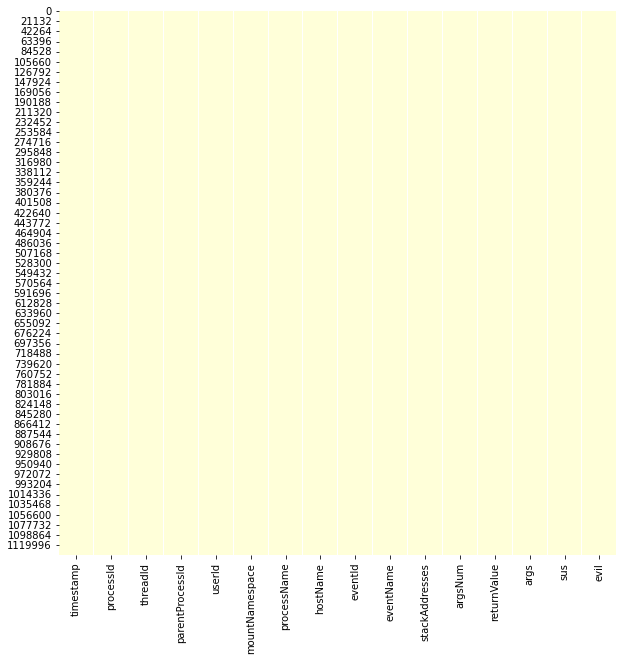

In [ ]:
#check null value in the dataset
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull(), cbar = False, cmap="YlGnBu")

In [ ]:
new = df.drop(['parentProcessId','userId','mountNamespace','argsNum'], axis = 1)

In [ ]:
new.head(5)

,timestamp,processId,threadId,processName,hostName,eventId,eventName,stackAddresses,returnValue,args,sus,evil
0,460.987552,7553.0,7553.0,tsm,ip-10-100-1-217,4.0,stat,[],-2.0,"[{'name': 'pathname', 'type': 'const char*', '...",1.0,1.0
1,896.173970,7302.0,7302.0,ps,ip-10-100-1-120,3.0,close,[140612356535467],0.0,"[{'name': 'fd', 'type': 'int', 'value': 4}]",0.0,0.0
2,461.460668,7555.0,7555.0,tsm,ip-10-100-1-217,42.0,connect,[],-114.0,"[{'name': 'sockfd', 'type': 'int', 'value': 79...",1.0,1.0
3,470.323093,7555.0,7555.0,tsm,ip-10-100-1-217,42.0,connect,[],-114.0,"[{'name': 'sockfd', 'type': 'int', 'value': 75...",1.0,1.0
4,325.141263,1573.0,1642.0,ssm-agent-worke,ip-10-100-1-129,41.0,socket,"[94530929929707, 94530929914324, 9453093151181...",11.0,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0.0,0.0


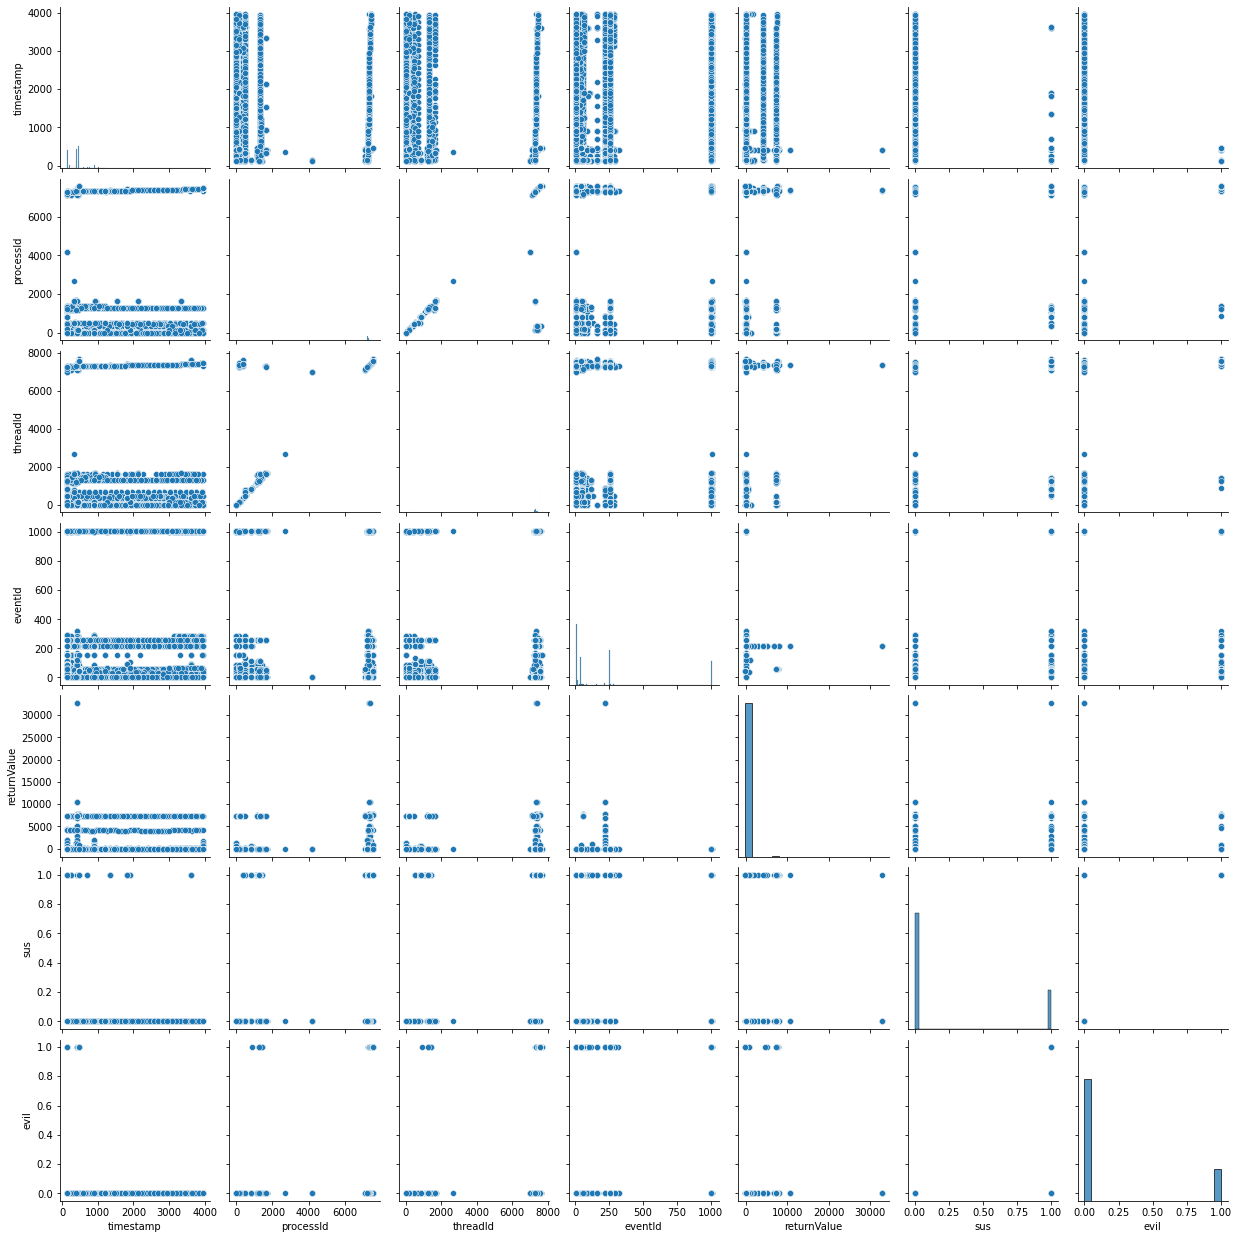

In [ ]:
sns.pairplot(new)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319292 entries, 0 to 319291
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   timestamp        319292 non-null  float64
 1   processId        319291 non-null  float64
 2   threadId         319290 non-null  float64
 3   parentProcessId  319290 non-null  float64
 4   userId           319290 non-null  float64
 5   mountNamespace   319290 non-null  float64
 6   processName      319289 non-null  object 
 7   hostName         319289 non-null  object 
 8   eventId          319289 non-null  float64
 9   eventName        319289 non-null  object 
 10  stackAddresses   319289 non-null  object 
 11  argsNum          319289 non-null  float64
 12  returnValue      319289 non-null  float64
 13  args             319289 non-null  object 
 14  sus              319289 non-null  float64
 15  evil             319289 non-null  float64
dtypes: float64(11), object(5)
memory usage

In [ ]:
df.describe()

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,sus,evil
count,319292.000000,319291.000000,319290.000000,319290.000000,319290.000000,3.192900e+05,319289.000000,319289.000000,319289.000000,319289.000000,319289.000000
mean,768.962903,6809.678939,6812.593993,2424.101760,218.903188,4.026519e+09,222.426582,2.675683,0.958865,0.251005,0.206916
std,954.364430,1907.251515,1901.384259,2994.992184,413.208816,7.125879e+06,344.377172,1.214307,366.062991,0.433592,0.405095
min,124.439221,1.000000,1.000000,0.000000,0.000000,4.020000e+02,2.000000,0.000000,-115.000000,0.000000,0.000000
25%,146.699255,7276.000000,7276.000000,187.000000,0.000000,4.026532e+09,4.000000,2.000000,0.000000,0.000000,0.000000
50%,413.505534,7309.000000,7309.000000,1317.000000,0.000000,4.026532e+09,42.000000,3.000000,0.000000,0.000000,0.000000
75%,709.662148,7386.000000,7386.000000,7102.000000,0.000000,4.026532e+09,257.000000,4.000000,0.000000,1.000000,0.000000
max,3954.587643,7555.000000,7705.000000,7552.000000,1001.000000,4.026532e+09,1010.000000,5.000000,32768.000000,1.000000,1.000000


#STEP 4 ENCODING

In [ ]:
#Target column encoding
def encode_text_index(df,name):
  le = preprocessing.LabelEncoder()
  df[name] = le.fit_transform(df[name])
  return le.classes_

In [ ]:
#Target column encoding
from sklearn import preprocessing
#def encode_text_index(df,name):
le = preprocessing.LabelEncoder()
le.fit_transform(df['hostName'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'ip-10-100-1-120': 0, 'ip-10-100-1-129': 1, 'ip-10-100-1-165': 2, 'ip-10-100-1-169': 3, 'ip-10-100-1-173': 4, 'ip-10-100-1-217': 5, 'ip-10-100-1-28': 6, 'ip-10-100-1-34': 7, 'ip-10-100-1-55': 8, 'ip-10-100-1-57': 9, 'ip-10-100-1-79': 10, 'ubuntu': 11}


In [ ]:
#Encoding the numeric column
def  encode_numeric_zscore(df, name, mean=None, sd=None):
  if mean is None:
    mean= df[name].mean()

  if sd is None:
    sd=df[name].std()

  df[name] = (df[name] - mean) / sd

In [ ]:
encode_numeric_zscore(df,'mountNamespace')
encode_numeric_zscore(df,'threadId')
encode_numeric_zscore(df,'processId')
encode_numeric_zscore(df,'timestamp')
encode_numeric_zscore(df,'parentProcessId')
encode_numeric_zscore(df,'eventId')
encode_numeric_zscore(df,'returnValue')

In [ ]:
hostNmae = encode_text_index(df,'hostName')
df.head()

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,2.191776,-3.802539,-3.824314,-0.861872,0,-0.651332,systemd,9,-0.654670,fstat,[],2,-0.009363,"[{'name': 'fd', 'type': 'int', 'value': 12}, {...",0,0
1,-0.782767,0.355551,0.355187,1.774855,1001,-0.651332,tsm,5,-0.550395,connect,[],3,-0.363020,"[{'name': 'sockfd', 'type': 'int', 'value': 20...",1,1
2,-0.148517,0.251517,0.250616,1.618007,0,-0.651332,sshd,9,-0.660306,close,[],1,-0.009363,"[{'name': 'fd', 'type': 'int', 'value': 8}]",0,0
3,-0.714181,0.239957,0.238997,-0.796548,0,1.532028,systemd-udevd,11,0.055526,openat,[],4,0.037170,"[{'name': 'dirfd', 'type': 'int', 'value': 6},...",0,0
4,-0.783934,0.355551,0.355187,1.774855,1001,-0.651332,tsm,5,-0.550395,connect,[],3,-0.363020,"[{'name': 'sockfd', 'type': 'int', 'value': 55...",1,1


In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

#STEP 5 Training Testing Spliting

In [ ]:
y=df[['evil']].copy()

In [ ]:
feature_selection=['timestamp','processId','threadId','eventId','returnValue']

In [ ]:
X=df[feature_selection].copy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=350)

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', max_leaf_nodes=30, random_state = 350)
RF_classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(criterion='entropy', max_leaf_nodes=30, n_estimators=40,
                       random_state=350)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = RF_classifier.predict(X_train)
y_predict_train
#cm = confusion_matrix(y_train, y_predict_train)
#sns.heatmap(cm, annot=True)

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# Predicting the Test set results
y_predict_test = RF_classifier.predict(X_test)
#cm = confusion_matrix(y_test, y_predict_test)
#sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     55781
         1.0       1.00      0.99      0.99     14464

    accuracy                           1.00     70245
   macro avg       1.00      0.99      1.00     70245
weighted avg       1.00      1.00      1.00     70245



# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBDT_classifier = GradientBoostingClassifier()
GBDT_classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = GBDT_classifier.predict(X_train)
y_predict_train
#cm = confusion_matrix(y_train, y_predict_train)
#sns.heatmap(cm, annot=True)

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# Predicting the Test set results
y_predict_test = GBDT_classifier.predict(X_test)
#cm = confusion_matrix(y_test, y_predict_test)
#sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    216080
           1       1.00      0.99      1.00     34958

    accuracy                           1.00    251038
   macro avg       1.00      1.00      1.00    251038
weighted avg       1.00      1.00      1.00    251038



# *XGBoost*

In [ ]:
from xgboost import XGBClassifier
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_predict_train = XGB_classifier.predict(X_train)
y_predict_train
#cm = confusion_matrix(y_train, y_predict_train)
#sns.heatmap(cm, annot=True)

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# Predicting the Test set results
y_predict_test = XGB_classifier.predict(X_test)
#cm = confusion_matrix(y_test, y_predict_test)
#sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    216080
           1       1.00      0.99      1.00     34958

    accuracy                           1.00    251038
   macro avg       1.00      1.00      1.00    251038
weighted avg       1.00      1.00      1.00    251038



# K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = neigh.predict(X_train)
y_predict_train



array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_predict_test = neigh.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    216080
           1       1.00      1.00      1.00     34958

    accuracy                           1.00    251038
   macro avg       1.00      1.00      1.00    251038
weighted avg       1.00      1.00      1.00    251038



# Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
neigh = GaussianNB()
neigh.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = neigh.predict(X_train)
y_predict_train


array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_predict_test = neigh.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    216376
           1       0.98      0.98      0.98     34662

    accuracy                           0.99    251038
   macro avg       0.99      0.99      0.99    251038
weighted avg       0.99      0.99      0.99    251038



# DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_classifier = DecisionTreeClassifier(max_leaf_nodes=30, random_state = 350)
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=30, random_state=350)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_predict_train = DT_classifier.predict(X_train)
y_predict_train
#cm = confusion_matrix(y_train, y_predict_train)
#sns.heatmap(cm, annot=True)

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# Predicting the Test set results
y_predict_test = DT_classifier.predict(X_test)
#cm = confusion_matrix(y_test, y_predict_test)
#sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    216080
           1       1.00      1.00      1.00     34958

    accuracy                           1.00    251038
   macro avg       1.00      1.00      1.00    251038
weighted avg       1.00      1.00      1.00    251038



# Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
AB_classifier = AdaBoostClassifier(n_estimators = 40,  random_state = 350)
AB_classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=40, random_state=350)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = AB_classifier.predict(X_train)
y_predict_train

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_predict_test = AB_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    216080
           1       0.99      0.99      0.99     34958

    accuracy                           1.00    251038
   macro avg       1.00      1.00      1.00    251038
weighted avg       1.00      1.00      1.00    251038



# Step 6 : ROC Curve

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
XGB_classifier = XGBClassifier()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

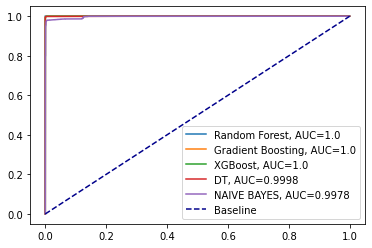

In [ ]:
#set up plotting area
plt.figure(0).clf()

#fit Random Forest model and plot ROC curve
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#fit Gradient Boosting model and plot ROC curve
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#fit XGBoost model and plot ROC curve
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

#fit DT model and plot ROC curve
model = DT_classifier
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="DT, AUC="+str(auc))


#fit NAIVE BAYES model and plot ROC curve

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="NAIVE BAYES, AUC="+str(auc)) 



# Plot line with no predictive power (baseline)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Baseline')

#add legend
plt.legend()